In [1]:
# DSC540,Summer 2023 - T302 Data Preparation(2237-1)
# Assignment: Project Milestone 04
# Author by:  Debabrata Mishra
# Date: 2023-08-12

# Topic - Credit Card Transactional & Demographic Data

# Milestone 5 - Assignment Instructions

Merging the Data and Storing in a Database/Visualizing Data

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results


# Summary of Project

In this project, I worked with a credit card fraud detection dataset from two distinct sources: one was a CSV file containing transaction data, and the other was web data containing the various key information Fraudulent transactions. Within the datset the Merchant address information was missing but logitude and latutude details were there. Hence used Geo Location API to get merchant address. 

The dataset contained crucial information about credit card transactions, including transaction amounts, timestamps, and anonymized variables associated with each transaction. The goal of the project was twofold: first, to perform data cleansing and merging to ensure the dataset's quality and coherence, and second, to create meaningful visualizations to gain insights into the data and accurately identify fraudulent transaction patterns.

# Activities Performed

Data Cleaning and Transformation:

I started by loading the dataset and performing data cleaning. This involved handling missing values, removing duplicates, and dealing with outliers. Since the dataset contained anonymized features, there was no need to perform feature scaling or normalization. After the initial data cleaning, I explored the data to gain an understanding of its distribution and patterns.

Data Merging and Storing in Database:

I split the dataset into two parts for demonstration purposes - one is the comination of CSV file data with merchant address populated (received from API) and the other for cleaned Web data. Both datasets were loaded into an SQLite database as individual tables. I used SQL queries to join these two tables into a consolidated dataset for further analysis.

Data Visualization:

With the consolidated dataset, I created five visualizations to gain insights into the credit card transaction data:

a) Scatter Plot: This scatter plot showcases the top 25 merchant states, ranked by a combined metric that considers both the web fraud percentage and the count of fraudulent transactions. 

b) Bar Plot: To compare the frequency of fraudulent and legitimate transactions, I created a bar plot. This provided a clear visual representation of the class imbalance in the dataset.

c) Density Plot: This density plot visualizes the distribution of Fraud Percentage of Web Data / Fraud count from flat file across different merchant states. 

d) Line Plot: I used a line plot to visualize the daily transaction volume and identify any unusual spikes that might indicate potential fraudulent activity.

e) Pie Chart: Lastly, I created a pie chart to visualize the proportion of different transaction types (e.g., online vs. in-store) for both legitimate and fraudulent transactions.

Apart from these , I also added Box Plot, Histogram and Violin Plot.

# Ethical Implications

During the project, it was essential to address ethical implications related to credit card fraud detection. Data cleansing played a crucial role in ensuring the accuracy of the results. However, it was important to be aware of potential biases that might be present in the data, as well as the consequences of false positives and false negatives in fraud detection.

It was essential to use visualization techniques responsibly, avoiding misleading visualizations that could impact decision-making or result in unjust consequences. Data privacy was a top concern, and I took necessary measures to handle sensitive information while demonstrating the project.


# Source Code

In [2]:
#Load the Necessary Libraries
import pandas as pd
import numpy as np
import requests as r
import xlrd
from bs4 import BeautifulSoup
import numpy as np
import datapackage
import matplotlib.pyplot as plt
import seaborn as sns
import time
import concurrent.futures
import json
import sqlite3
from sqlalchemy import create_engine
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the combined and cleaned final combined dataset from Flat File and API data.
api_ff_comb_data_final = pd.read_csv('api_ff_comb_data_final.csv', sep=",")

# Print data to check the new columns.
api_ff_comb_data_final
    

,row_id,trans_date_trans_time,merch_name,category,amount,first,last,gender,street,city,...,txn_date,customer_age,masked_accountNumber,BIN,merch_address,merch_state,merch_postcode,merch_country_code,zip_match,state_match
0,2472,2019-01-02 01:47:29,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,2019-01-02,58.0,3401*******0220,340187,"{""county"": ""Bandera County"", ""state"": ""Texas"",...",Texas,NaN,us,N,N
1,2546,2019-01-02 03:38:03,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,2019-01-02,30.0,4613*****1966,461331,"{""building"": ""BRP US Inc"", ""house_number"": ""12...",North Carolina,28777,us,N,N
2,3580,2019-01-03 01:05:27,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,2019-01-03,58.0,3401*******0220,340187,"{""county"": ""Karnes County"", ""state"": ""Texas"", ...",Texas,NaN,us,N,N
3,4693,2019-01-03 22:58:44,fraud_Mosciski Group,travel,4.50,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,2019-01-03,77.0,4922********1201,492271,"{""county"": ""Mineral County"", ""state"": ""West Vi...",West Virginia,NaN,us,N,N
4,4808,2019-01-04 00:58:03,"fraud_Stokes, Christiansen and Sipes",grocery_net,14.37,Mark,Brown,M,8580 Moore Cove,Wales,...,2019-01-04,79.0,3415*******6537,341546,"{""road"": ""Nome-Taylor Highway"", ""county"": ""Nom...",Alaska,NaN,us,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,1114738,2020-04-08 15:33:40,fraud_Hermann-Gaylord,misc_pos,2.12,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,...,2020-04-08,32.0,4642********5942,464225,"{""county"": ""Uintah County"", ""state"": ""Utah"", ""...",Utah,NaN,us,N,N
17595,136824,2019-03-16 10:32:54,fraud_Christiansen-Gusikowski,misc_pos,34.97,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,...,2019-03-16,25.0,1800*******0192,180011,"{""road"": ""268th Street"", ""county"": ""Jefferson ...",Iowa,NaN,us,N,N
17596,37638,2019-01-22 18:04:04,fraud_Howe Ltd,misc_pos,4.26,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,2019-01-22,34.0,3553********4918,355362,"{""county"": ""Jefferson County"", ""state"": ""Washi...",Washington,NaN,us,N,N
17597,453698,2019-07-20 16:17:40,fraud_Gislason Group,travel,7.00,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,2019-07-20,47.0,3749*******3758,374930,"{""road"": ""Carlton Rockwood Road"", ""town"": ""Ash...",Michigan,48179,us,N,N


In [4]:
# Create a SQLite database connection
engine = create_engine('sqlite:///mydatabase.db')

In [5]:
# Create table CSV_API_FINAL_DATA from the api_ff_comb_data_final data frame
api_ff_comb_data_final.to_sql('CSV_API_FINAL_DATA', engine, index=False, if_exists='replace')

17599

In [6]:
# Read the finel cleaned version of Web data
web_data_final = pd.read_csv('web_data_final.csv', sep=",")

# Print data to check the new columns.
web_data_final

,Time,Amount,Class,amount_range,is_fraud,year,month,day,hour,weekday,dayofYear
0,1970-01-01 00:00:00,149.62,'0',07: 100.01 - 200.00,0,1970,1,1,0,Thu,1
1,1970-01-01 00:00:00,2.69,'0',03: 001.01 - 005.00,0,1970,1,1,0,Thu,1
2,1970-01-01 00:00:01,123.50,'0',07: 100.01 - 200.00,0,1970,1,1,0,Thu,1
3,1970-01-01 00:00:02,69.99,'0',06: 050.01 - 100.00,0,1970,1,1,0,Thu,1
4,1970-01-01 00:00:02,3.67,'0',03: 001.01 - 005.00,0,1970,1,1,0,Thu,1
...,...,...,...,...,...,...,...,...,...,...,...
252036,1970-01-02 23:59:45,2.69,'0',03: 001.01 - 005.00,0,1970,1,2,23,Fri,2
252037,1970-01-02 23:59:46,0.77,'0',02: 000.01 - 001.00,0,1970,1,2,23,Fri,2
252038,1970-01-02 23:59:47,24.79,'0',04: 005.01 - 025.00,0,1970,1,2,23,Fri,2
252039,1970-01-02 23:59:48,67.88,'0',06: 050.01 - 100.00,0,1970,1,2,23,Fri,2


In [7]:
# Create table CSV_API_FINAL_DATA from the api_ff_comb_data_final data frame
web_data_final.to_sql('WEB_FINAL_DATA', engine, index=False, if_exists='replace')

252041

In [8]:
# Join both table using the amount interval of 10 so that we can able to add the Fraud % from Web data to the combined data.

# Connect to the SQLite database
conn = sqlite3.connect('mydatabase.db')

# Your SQL query
query = """
SELECT T1.*
     , (CASE  WHEN T2.web_fraud_percentage IS NULL THEN 0.00 ELSE T2.web_fraud_percentage END) AS web_fraud_percentage
  FROM CSV_API_FINAL_DATA T1
  LEFT OUTER JOIN 
		(SELECT ROUND(Amount/10)*10 AS web_amount_interval
			   ,ROUND(((CAST(SUM(is_fraud) AS REAL) / COUNT(*))* 100),2)  AS web_fraud_percentage
		   FROM WEB_FINAL_DATA
		 GROUP BY 1
        ) T2 ON ((ROUND(T1.amount/10)*10) = T2.web_amount_interval )
        
        """

# Fetch data from the database and store it in a DataFrame
df_project_milestone5 = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [9]:
# Print data to check comobined data
df_project_milestone5

,row_id,trans_date_trans_time,merch_name,category,amount,first,last,gender,street,city,...,customer_age,masked_accountNumber,BIN,merch_address,merch_state,merch_postcode,merch_country_code,zip_match,state_match,web_fraud_percentage
0,2472,2019-01-02 01:47:29,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,58.0,3401*******0220,340187,"{""county"": ""Bandera County"", ""state"": ""Texas"",...",Texas,None,us,N,N,0.07
1,2546,2019-01-02 03:38:03,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,30.0,4613*****1966,461331,"{""building"": ""BRP US Inc"", ""house_number"": ""12...",North Carolina,28777,us,N,N,0.07
2,3580,2019-01-03 01:05:27,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,58.0,3401*******0220,340187,"{""county"": ""Karnes County"", ""state"": ""Texas"", ...",Texas,None,us,N,N,0.07
3,4693,2019-01-03 22:58:44,fraud_Mosciski Group,travel,4.50,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,77.0,4922********1201,492271,"{""county"": ""Mineral County"", ""state"": ""West Vi...",West Virginia,None,us,N,N,0.31
4,4808,2019-01-04 00:58:03,"fraud_Stokes, Christiansen and Sipes",grocery_net,14.37,Mark,Brown,M,8580 Moore Cove,Wales,...,79.0,3415*******6537,341546,"{""road"": ""Nome-Taylor Highway"", ""county"": ""Nom...",Alaska,None,us,N,N,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,1114738,2020-04-08 15:33:40,fraud_Hermann-Gaylord,misc_pos,2.12,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,...,32.0,4642********5942,464225,"{""county"": ""Uintah County"", ""state"": ""Utah"", ""...",Utah,None,us,N,N,0.31
17595,136824,2019-03-16 10:32:54,fraud_Christiansen-Gusikowski,misc_pos,34.97,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,...,25.0,1800*******0192,180011,"{""road"": ""268th Street"", ""county"": ""Jefferson ...",Iowa,None,us,N,N,0.06
17596,37638,2019-01-22 18:04:04,fraud_Howe Ltd,misc_pos,4.26,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,34.0,3553********4918,355362,"{""county"": ""Jefferson County"", ""state"": ""Washi...",Washington,None,us,N,N,0.31
17597,453698,2019-07-20 16:17:40,fraud_Gislason Group,travel,7.00,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,47.0,3749*******3758,374930,"{""road"": ""Carlton Rockwood Road"", ""town"": ""Ash...",Michigan,48179,us,N,N,0.07


\newpage

#### This bar plot illustrates both the transaction counts and the fraud counts attributed to each state. Along the horizontal x-axis, the states are depicted, while the vertical y-axis denotes the count values. Each individual bar corresponds to a state and its height reflects the quantity of transactions associated with that particular state

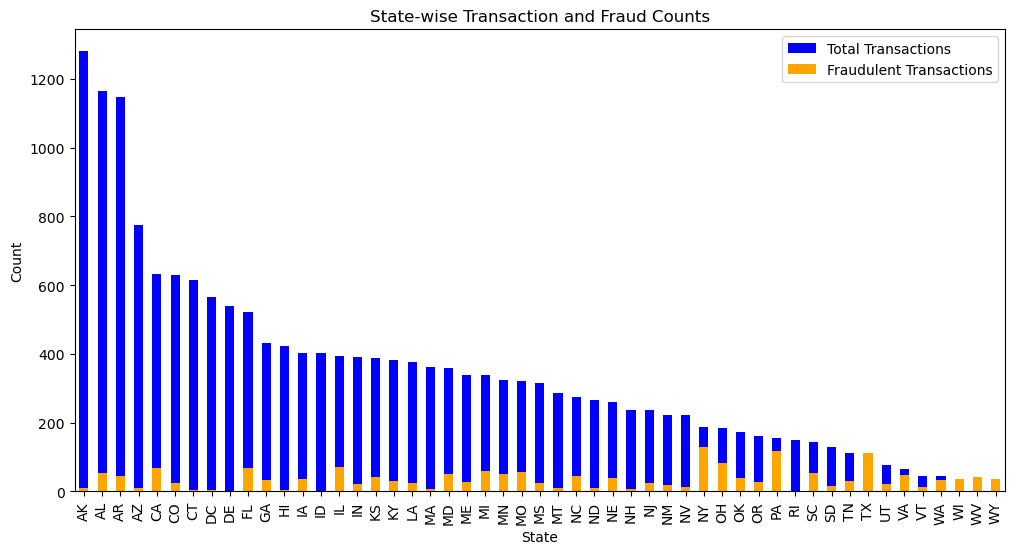

In [10]:
# Visualization 1 - Bar Plot: State-wise Transaction Count

# Calculate state-wise transaction and fraud counts
state_counts = df_project_milestone5['state'].value_counts()
fraud_counts = df_project_milestone5.groupby('state')['is_fraud'].sum()

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Plot transaction counts as blue bars
state_counts.plot(kind='bar', color='blue', label='Total Transactions')

# Plot fraud counts as orange bars
fraud_counts.plot(kind='bar', color='orange', label='Fraudulent Transactions')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('State-wise Transaction and Fraud Counts')
plt.legend()
plt.show()

\newpage

#### This pie chart portrays the breakdown of transactions by gender. Each segment of the pie symbolizes a distinct gender category, with its area proportional to the percentage of transactions linked to that gender. The labels accompanying each segment indicate the gender categories, while the percentages signify the relative occurrence of each gender category within the dataset

Text(0.5, 1.0, 'Gender Distribution')

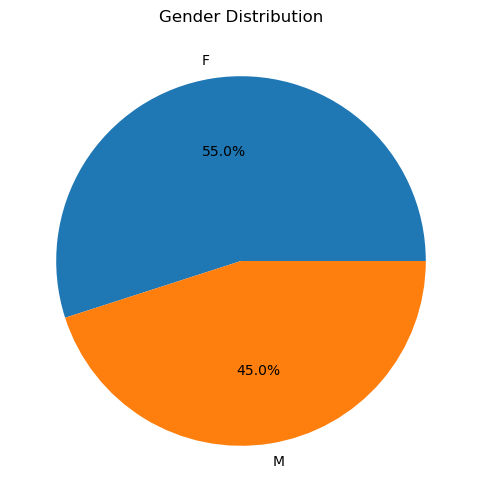

In [11]:
# Visualization 2 - Pie Chart: Gender Distribution

# Count the number of transactions by gender
gender_counts = df_project_milestone5['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

\newpage

#### This visualization will provide insights into the distribution of transaction amounts for the top 25 states with the highest fraud counts, helping you identify any potential patterns or variations in fraudulent transactions across these states.

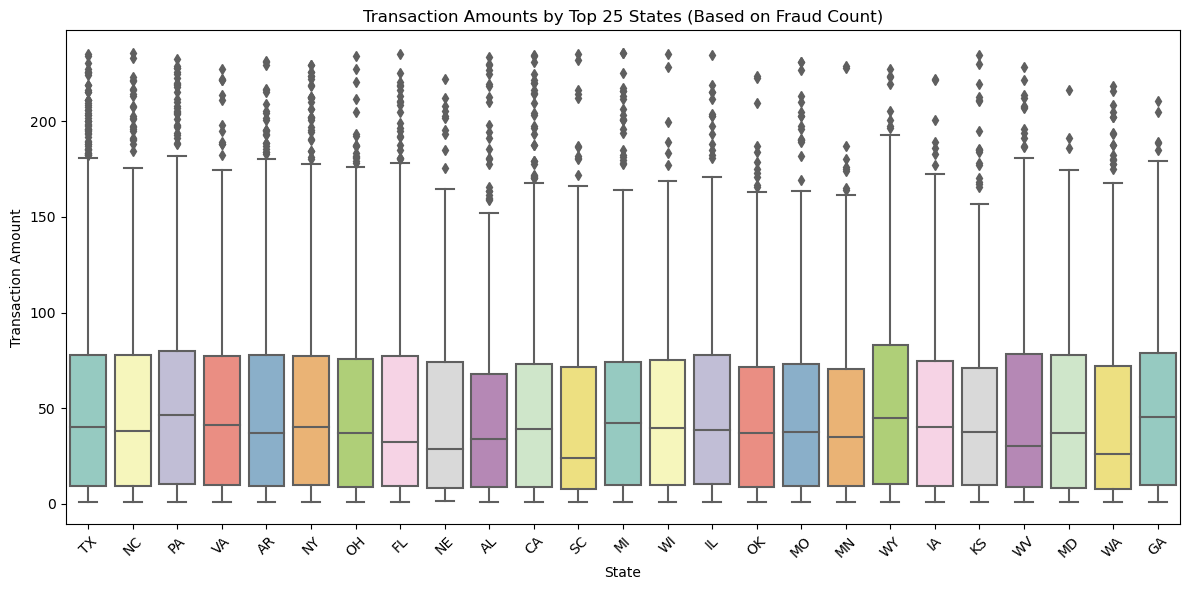

In [12]:
# Visualization 3 - Box Plot of Transaction Amounts Vs Fraud Count for top 25 States

# Calculate top 25 states by fraud count
top_states_by_fraud = df_project_milestone5.groupby('state')['is_fraud'].sum().nlargest(25).index

# Filter data for top 25 states by fraud count
top_states_by_fraud_data = df_project_milestone5[df_project_milestone5['state'].isin(top_states_by_fraud)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='amount', data=top_states_by_fraud_data, palette='Set3')
plt.xlabel('State')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts by Top 25 States (Based on Fraud Count)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

\newpage

#### The histogram allows you to grasp the overall shape of the transaction amount distribution, including insights into the concentration of transactions around certain amounts and the spread or dispersion of transactions across the entire range of amounts. It helps you identify common transaction value ranges, potential outliers, and any patterns that may exist within the transaction data.

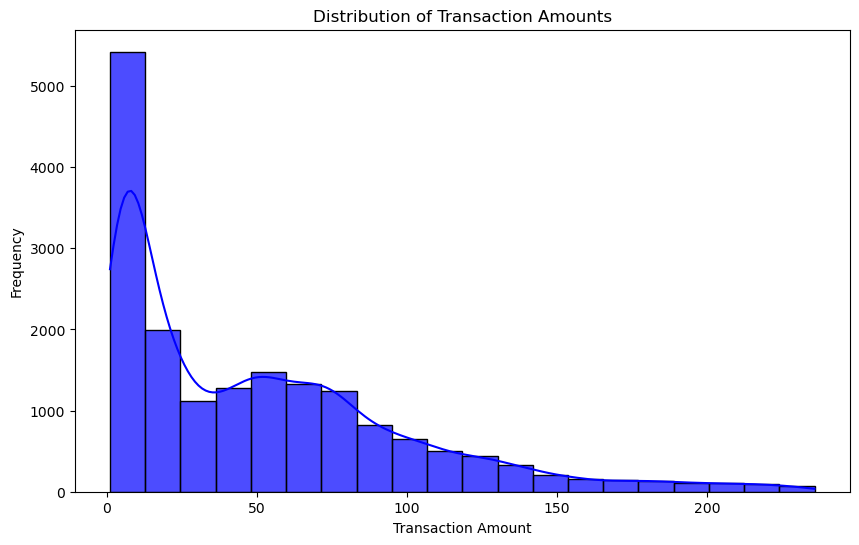

In [13]:
# Visualization 4  - Histogram of Transaction Amounts

plt.figure(figsize=(10, 6))
sns.histplot(data=df_project_milestone5, x='amount', bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()



\newpage

####  Violin plot that displays the distribution of transaction amounts for different web fraud percentage categories. Each violin plot shows the kernel density estimation of the data, allowing you to understand the density of data points at different transaction amounts for each web fraud percentage category

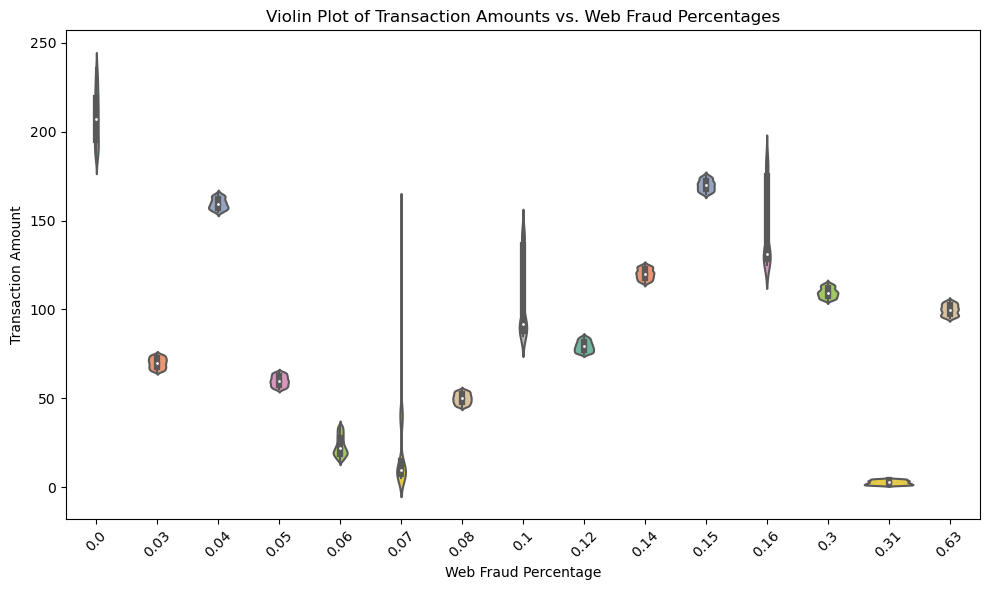

In [14]:
# Visualization 5 - Violin plot - Transaction Amounts vs. Web Fraud Percentages

plt.figure(figsize=(10, 6))
sns.violinplot(x='web_fraud_percentage', y='amount', data=df_project_milestone5, palette='Set2')
plt.title('Violin Plot of Transaction Amounts vs. Web Fraud Percentages')
plt.xlabel('Web Fraud Percentage')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


\newpage

#### This density plot visualizes the distribution of Fraud Percentage of Web Data across different merchant states. The x-axis represents the fraud count, and the y-axis represents the density of occurrences. Each curve corresponds to a different merchant state, showing how fraud counts are distributed within that state. The legend on the side indicates the merchant states, allowing for easy comparison between their distributions

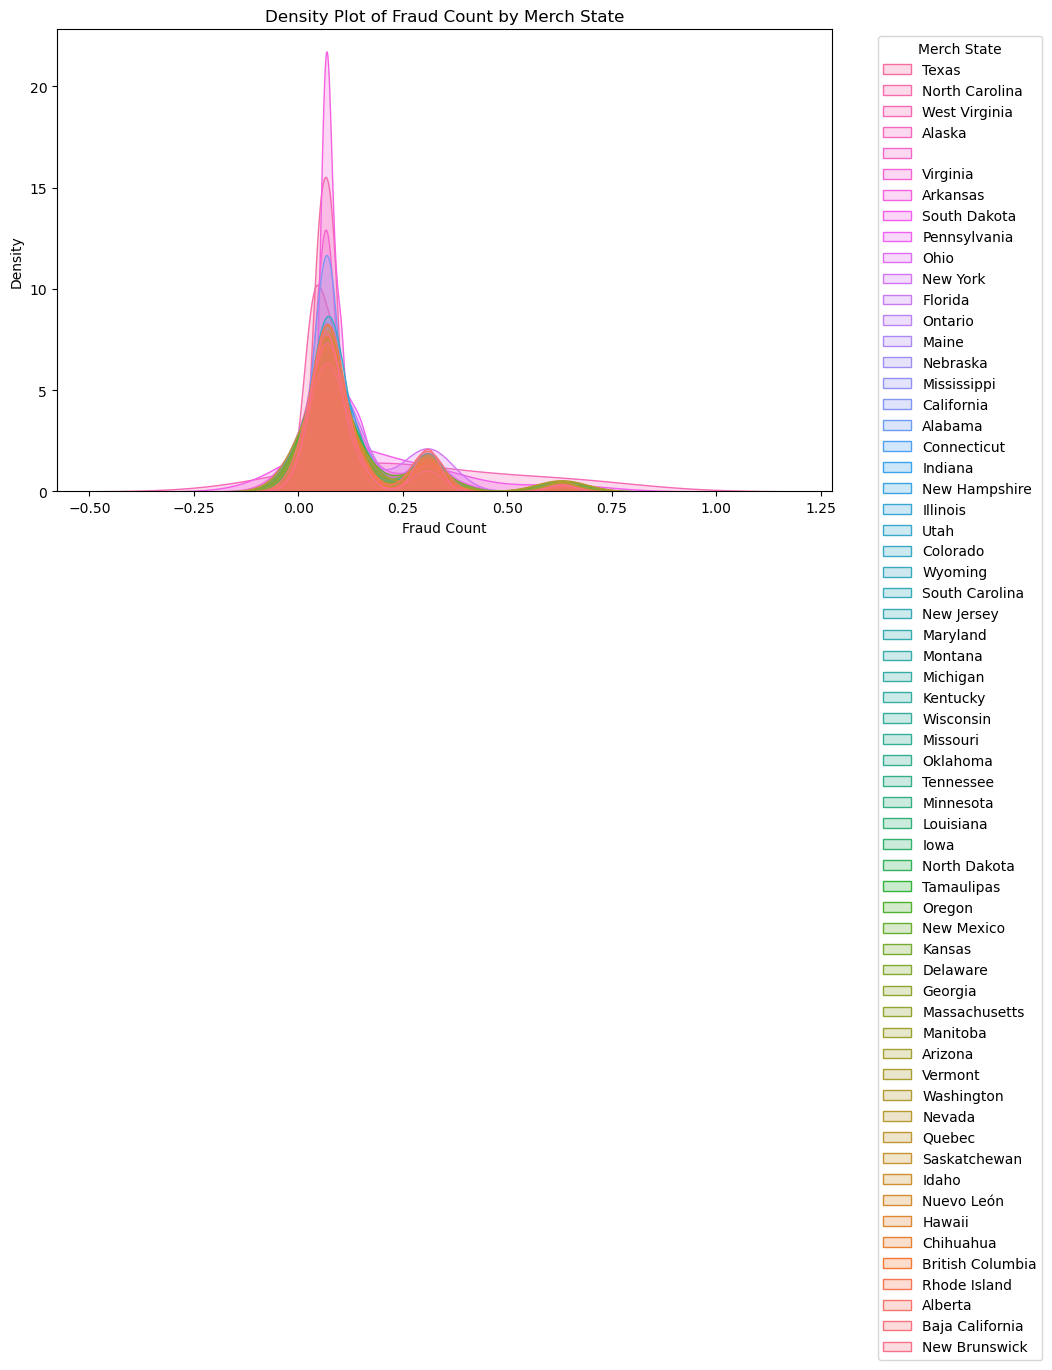

In [15]:
# Visualization 6 - Density plot - Web Fraud Percentages by Merchant State

plt.figure(figsize=(10, 6))
plot = sns.kdeplot(data=df_project_milestone5, x='web_fraud_percentage', hue='merch_state', fill=True, common_norm=False)
plt.title('Density Plot of Fraud Count by Merch State')
plt.xlabel('Fraud Count')
plt.ylabel('Density')

# Get unique merch_state values
merch_state_labels = df_project_milestone5['merch_state'].unique()

# Customize the legend labels
plt.legend(title='Merch State', labels=merch_state_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

\newpage

#### This density plot visualizes the distribution of fraud counts across different merchant states. The x-axis represents the fraud count, and the y-axis represents the density of occurrences. Each curve corresponds to a different merchant state, showing how fraud counts are distributed within that state. The legend on the side indicates the merchant states, allowing for easy comparison between their distributions

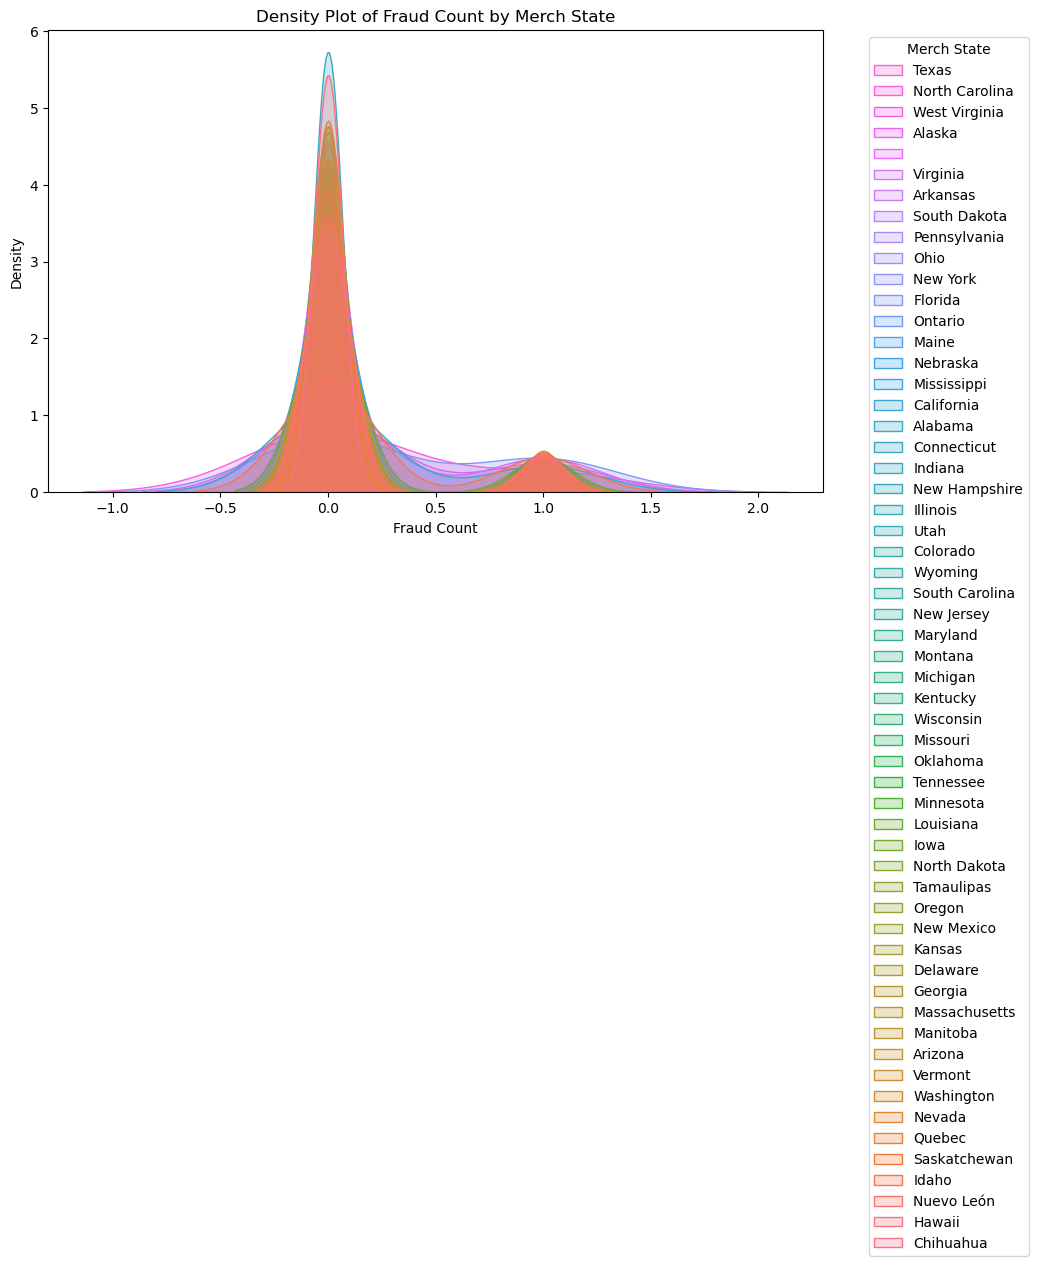

In [16]:
# Visualization 7 - Density plot - Fraud_count by Merchant State
plt.figure(figsize=(10, 6))
plot = sns.kdeplot(data=df_project_milestone5, x='is_fraud', hue='merch_state', fill=True, common_norm=False)
plt.title('Density Plot of Fraud Count by Merch State')
plt.xlabel('Fraud Count')
plt.ylabel('Density')

# Get unique merch_state values
merch_state_labels = df_project_milestone5['merch_state'].unique()

# Customize the legend labels
plt.legend(title='Merch State', labels=merch_state_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

\newpage

This scatter plot showcases the top 25 merchant states, ranked by a combined metric that considers both the web fraud percentage and the count of fraudulent transactions. Each point on the plot represents a merchant state, with its position along the y-axis indicating the state and its position along the x-axis representing the count of fraudulent transactions. The color of each point corresponds to the web fraud percentage associated with that state. The plot provides a visual comparison of states based on both fraudulent activity volume and the severity of web fraud. A legend on the side helps interpret the color-coded web fraud percentages

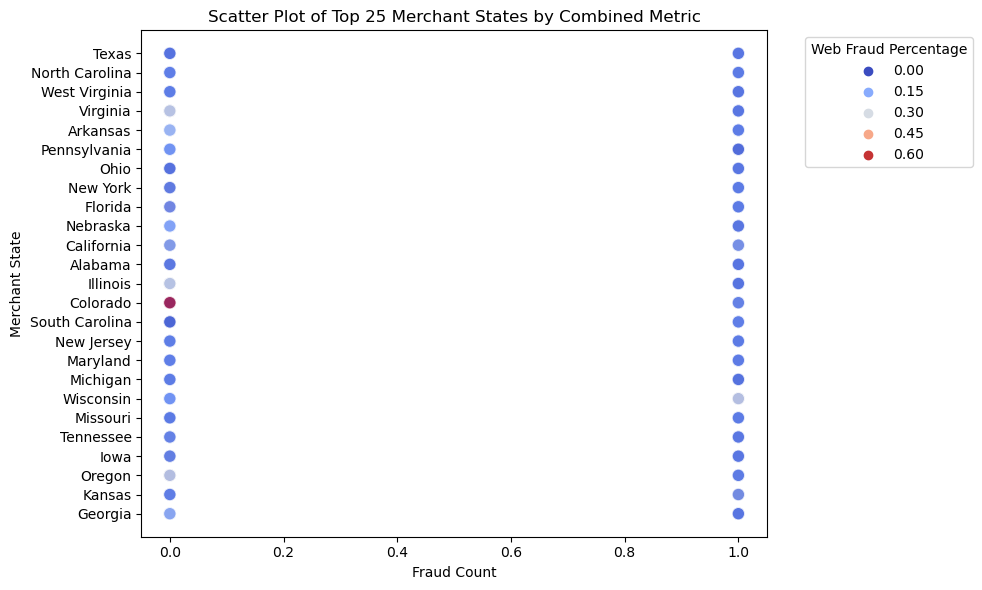

In [17]:
# Visualization 8 - Scatter plot for the top 25 states based on both web fraud percentage and is_fraud count

# Calculate a combined metric
df_project_milestone5['combined_metric'] = df_project_milestone5['web_fraud_percentage'] * df_project_milestone5['is_fraud']

# Determine the top 25 states based on the combined metric
top_25_states = df_project_milestone5.groupby('merch_state')['combined_metric'].sum().nlargest(25).index

# Filter the data to include only the transactions from the top 25 states
df_top_25_states = df_project_milestone5[df_project_milestone5['merch_state'].isin(top_25_states)]

# Create a scatter plot for the top 25 states using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_25_states, x='is_fraud', y='merch_state', hue='web_fraud_percentage', palette='coolwarm', alpha=0.7, s=80)
plt.title('Scatter Plot of Top 25 Merchant States by Combined Metric')
plt.xlabel('Fraud Count')
plt.ylabel('Merchant State')
plt.legend(title='Web Fraud Percentage')

# Adjust the legend position
plt.legend(title='Web Fraud Percentage', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

\newpage

 The bar plot helps visualize the class imbalance between fraudulent and legitimate transactions

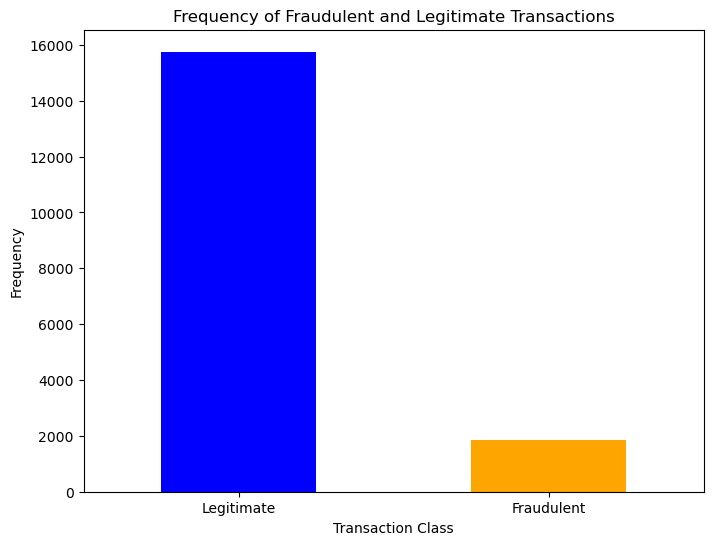

In [18]:
# Visualization 9 - Bar Plot - frequency of fraudulent and legitimate transactions
# Count the frequency of fraudulent and legitimate transactions
fraud_counts = df_project_milestone5['is_fraud'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Transaction Class')
plt.ylabel('Frequency')
plt.title('Frequency of Fraudulent and Legitimate Transactions')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'], rotation=0)
plt.show()

\newpage

Line plot to visualize the daily transaction volume and identify any unusual spikes that might indicate potential fraudulent activity

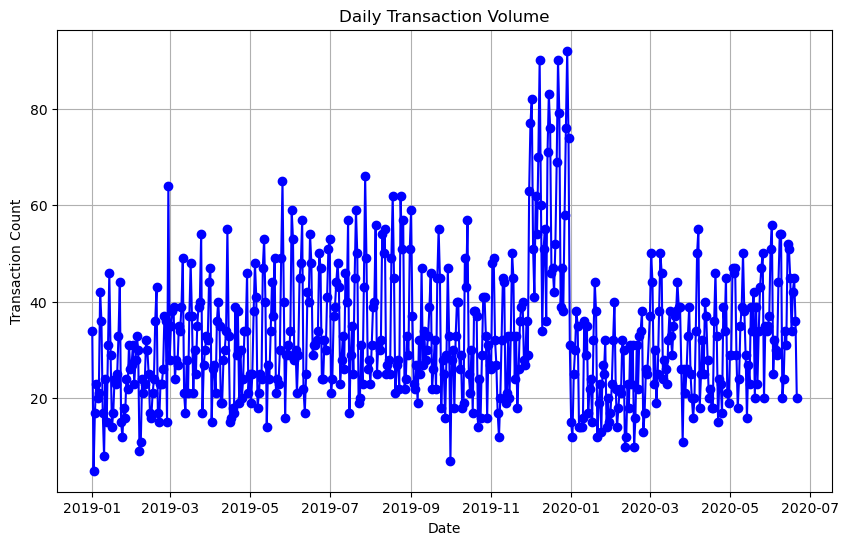

In [19]:
# Visualization 10 - Line Plot - daily transaction volume

# Convert the 'transaction_date' column to datetime
df_project_milestone5['txn_date'] = pd.to_datetime(df_project_milestone5['txn_date'])

# Group data by date and calculate daily transaction count
daily_transaction_count = df_project_milestone5.groupby(df_project_milestone5['txn_date'].dt.date)['row_id'].count()

# Create a line plot
plt.figure(figsize=(10, 6))
daily_transaction_count.plot(kind='line', marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Daily Transaction Volume')
plt.grid(True)
plt.show()

# Conclusion

The credit card fraud detection project allowed me to explore the entire data science pipeline, from data cleaning and merging to visualization. I learned the significance of ethical considerations while dealing with sensitive data and presenting results. Additionally, the project gave me insights into techniques for credit card fraud detection, which can be extended further using advanced machine learning models. Overall, it was an enriching experience that deepened my understanding of data analysis and visualization in real-world applications.